In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from Clustering.kMeansAlg import distance,KMeansAlgForIris,AssignCluster
import logging

In [2]:
dataset=load_iris(return_X_y=True)
features=dataset[0]
label=dataset[1]

In [3]:
def TotalCost(data,clusters,centroids):
    totalDistance=0
    for i in range(len(clusters)):
        totalDistance+=np.sum(distance(data[clusters[i]],centroids[i]))
    return totalDistance

In [4]:
def GetClusters(data,centroids):
    clusterLabels=AssignCluster(data,centroids)
    cluster=[]
    for i in range(centroids.shape[0]):
        cluster.append(np.where(clusterLabels==i)[0])
    return cluster

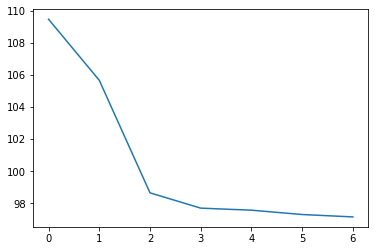

In [5]:
logging.basicConfig(level=logging.INFO,filename="kMeans.log",filemode="w")
m=100 # start 100 times k-means with different initial points
bestCentroids=None
lowestCost=0x7FFFFFFF
costList=[]
lowestCostList=[]
for i in range(m):
    logging.debug("Start "+str(i)+"th k-means")
    centroids=KMeansAlgForIris(features,features.shape[0],len(np.unique(label)),maxSteps=10000,shuffle=False)
    logging.info(str(i+1)+"/"+str(m)+" iteration, Total cost: "+str(TotalCost(features,GetClusters(features,centroids),centroids)))
    costList.append(TotalCost(features,GetClusters(features,centroids),centroids))
    if costList[-1]<lowestCost:
        bestCentroids=centroids
        lowestCost=costList[-1]
        lowestCostList.append(lowestCost)
# plt.plot(costList)
plt.plot(lowestCostList)

In [6]:
def Visualization(data,centroids):
    clussterAssigment=AssignCluster(data,centroids)
    for i in range(0,centroids.shape[0]):
        plt.figure(i)
        clusterPoints=features[np.where(clussterAssigment==i)[0]]
        plt.scatter(clusterPoints[:,0],clusterPoints[:,1])
        plt.scatter(centroids[i,0],centroids[i,1])

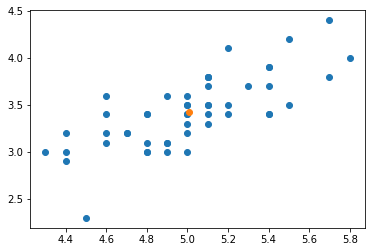

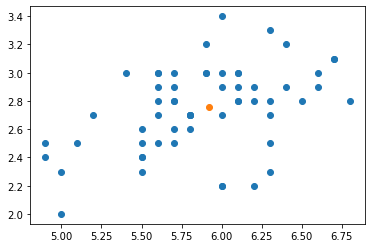

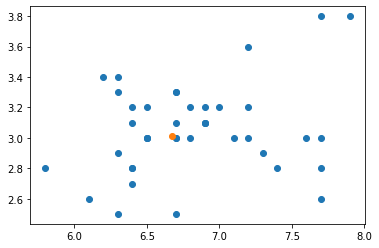

In [7]:
Visualization(features,bestCentroids)